# monte_carlo_stock_price_v1_3_student
This is a version of the Monte Carlo simulator that is consistent with the modeling contained in the <b> Monte Carlo Simulations </b> lecture in Economics 136, assuming <b> Geometric Brownian Motion</b>. Prepared by Professor Evans on March 3, 2019, modified in April 2019 and January 27, 2020 (V3). This calculates Ito-adjusted-drift.

In [419]:
%matplotlib inline

In [420]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Set assumptions, including simulation length and the number of simulations. Note that if sims is increased more than 12, the color palettes below must be expanded.

In [421]:
days = 18               # default 18
sims = 1000             # default 1000
stock_sym = "HMC"
stock_pr = 100.00       # default 100.0
drift = 0.00041         # our mean, and we could call it that, but it is drift in our model default = 0.00041
sigma = 0.0180          # default 0.0180
call_strike = 110.0     # default 110.0
call_price = 0.84       # default 0.84
call_be = call_strike + call_price
# put_strike = 90
# put_price = 0.40
# put_be = put_strike - put_price

Set up the numpy arrays for efficiency. We are going to take our random draws for each step in all simulations before we do anything else. Numpy arrays must be typed (often a default is assumed) and the arrays of fixed size, and arrays must be initialized, just like the glory days of Fortran. Order equals 'C' is actually default and unnecessary but it is there to remind you that 'F' is an option.  

In [422]:
setup = np.arange(sims*days)   #note here that we are creating one very long 1D array
setup = setup.reshape((sims,days),order='C')  #for contiguous columns, order = 'F'
draw = np.zeros_like(setup, dtype="float32")
price = np.zeros_like(setup, dtype="float32")

Set the random seed value if you want each simulation to be the same (while debugging or when asking students to submit simulations that must be identical for grading). To make it more "random," remove the seed command.

In [423]:
np.random.seed(742)
draw = np.random.standard_normal([sims,days])

Let's do the mean adjustment for the Ito method separately so that we remember that it is necessary:

In [424]:
ito_adj_drift = drift - ((sigma**2)/2)
"{:.7f}".format(ito_adj_drift)

'0.0002480'

Let's do the simulation, starting with setting the first value of each simulation equal to the price of the stock:

In [425]:
price[0:,:1] = stock_pr

Set our counters to zero:

In [426]:
eur_itm_count = 0
eur_profit_count = 0
amer_itm_count = 0
amer_profit_count = 0

It is possible to use the numpy nditer command to do away with the for loops below but the code is nearly impossible to read, so these old-fashioned for loops are left in. This is much more complicated than array mulitplication - each element must be iterated one element at a time sequentially.

In [427]:
for i in range(0,sims):  # rows (each a different simulation)
    for j in range(1,days):    # cols (each a new day!) 
        price[i,j] = 14  #student has to figure this out
        # American-style counters go here
        if price[i,j] > call_strike:
            pass 
        if price[i,j] > call_be:
            pass

European style counters go here (only count the final day)

In [428]:
# student has to add this 

Calculate a reference drift for plotting:

In [429]:
# Calculate the reference lines for drift, the call strike, and the break-even

Now let's plot it using Seaborn

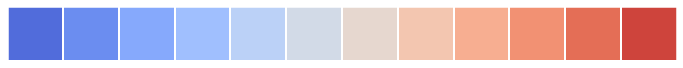

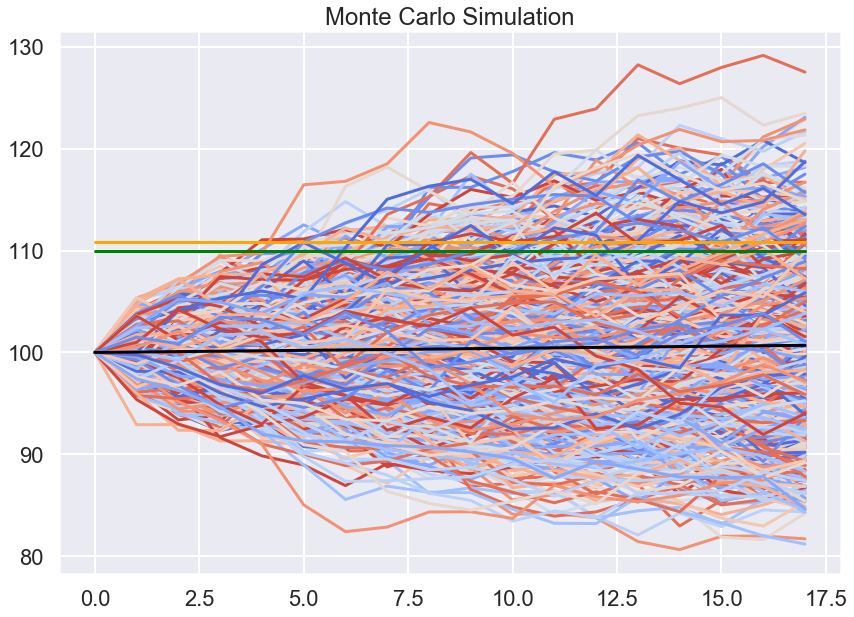

In [430]:
sns.set_style("darkgrid")
sns.palplot(sns.color_palette("coolwarm",12))
sns.set_palette("coolwarm", 12)
sns.set_context("poster")
fig, ax = plt.subplots()
fig.set_size_inches(14,10)
# plt.plot(put, color="green")
plt.title("Monte Carlo Simulation")
for k in range(0,sims):
    plt.plot(price[k,...])
plt.plot(ref, color="black")
plt.plot(call_stk, color="green")
plt.plot(call_bre, color="orange")

Print ITM and profit frequency:

In [431]:
print("European in the money {} times at {:.3f} percent.".format(eur_itm_count,((eur_itm_count/sims)*100)))
print("European profitable {} times at {:.3f} percent.".format(eur_profit_count,(eur_profit_count/sims)*100))
print("American in the money {} times in {:,} opportunities".format(amer_itm_count,days*sims))
print("American profitable:", amer_profit_count)

European in the money 111 times at 11.100 percent.
European profitable 90 times at 9.000 percent.
American in the money 854 times in 18,000 opportunities
American profitable: 681
